# Prediction for win/loss between two teams
## Logistics Regression

In [1]:
import pandas as pd

path_coaches_season = '/Users/Pashlene/Desktop/Modified_coaches_season.csv'
path_coaches_career = '/Users/Pashlene/Desktop/Modified_coaches_career.csv'
path_teams = '/Users/Pashlene/Desktop/Modified_teams.csv'
path_team_season = '/Users/Pashlene/Desktop/Modified_team_season.csv'

coaches_season_df = pd.read_csv(path_coaches_season)
coaches_career_df = pd.read_csv(path_coaches_career)
teams_df = pd.read_csv(path_teams)
team_season_df = pd.read_csv(path_team_season)

coaches_season_df.head()

,coachid,year,yr_order,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,team
0,RUSSEJO01,1946,1,John,Russell,22,38,0,0,BOS
1,OLSENHA01,1946,1,Harold,Olsen,39,22,5,6,CH1
2,DEHNEDU01,1946,1,Dutch,Dehnert,17,20,0,0,CL1
3,CLIFFRO01,1946,2,Roy,Clifford,13,10,1,2,CL1
4,CURTIGL01,1946,1,Glenn,Curtis,12,22,0,0,DE1


In [2]:
coaches_career_df.head()

,coachid,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss
0,ADELMRI01,Rick,Adelman,658,411,67,60
1,ADUBARI01,Richie,Adubato,127,240,3,5
2,AINGEDA01,Danny,Ainge,136,90,3,9
3,ALBECST01,Stan,Albeck,307,267,18,26
4,ARMSTPA01,Paul,Armstrong,22,32,0,0


In [3]:
teams_df.head()

,team,location,name,leag
0,ANA,Anaheim,Amigos,A
1,AND,Anderson,Duffey Packers,N
2,ATL,Atlanta,Hawks,N
3,BA1,Baltimore,Bullets,N
4,BAL,Baltimore,Bullets,N


In [4]:
team_season_df.head()

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,...,0,0,0,0,0,0,3900,0.0,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,...,0,0,0,0,0,0,4471,0.0,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,...,0,0,0,0,0,0,4308,0.0,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,...,0,0,0,0,0,0,3918,0.0,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,...,0,0,0,0,0,0,3840,0.0,33,27


In [5]:
# Calculate per-game stats for teams from the team_season_df

# We're interested in the offensive and defensive stats, so we'll exclude identifiers and summary stats like 'won' and 'lost'.
stats_columns = [col for col in team_season_df.columns if col.startswith(('o_', 'd_')) and not col.endswith(('3pm', '3pa'))]  # Exclude 3-point stats as they might not be available for all historical seasons.

# Add games played column
team_season_df['games_played'] = team_season_df['won'] + team_season_df['lost']

# Calculate per-game stats
for col in stats_columns:
    team_season_df[col + '_per_game'] = team_season_df[col] / team_season_df['games_played']

# Select the relevant columns for the model, which includes the per-game stats and excludes the total stats.
per_game_stats_columns = [col for col in team_season_df.columns if 'per_game' in col]
team_per_game_stats_df = team_season_df[['team', 'year'] + per_game_stats_columns]

# Display the first few rows of the per-game stats dataframe
team_per_game_stats_df.head()


,team,year,o_fgm_per_game,o_fga_per_game,o_ftm_per_game,o_fta_per_game,o_oreb_per_game,o_dreb_per_game,o_reb_per_game,o_asts_per_game,...,d_fta_per_game,d_oreb_per_game,d_dreb_per_game,d_reb_per_game,d_asts_per_game,d_pf_per_game,d_stl_per_game,d_to_per_game,d_blk_per_game,d_pts_per_game
0,BOS,1946,23.283333,85.550000,13.516667,22.916667,0.0,0.0,0.0,7.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.000000
1,CH1,1946,30.803279,103.426230,15.393443,25.409836,0.0,0.0,0.0,7.147541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.295082
2,CL1,1946,27.900000,94.983333,15.050000,23.800000,0.0,0.0,0.0,8.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.800000
3,DE1,1946,23.950000,97.383333,15.383333,24.900000,0.0,0.0,0.0,8.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.300000
4,NYK,1946,24.416667,87.583333,15.850000,23.966667,0.0,0.0,0.0,7.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.000000


In [6]:
# Calculate win percentage for coaches from the coaches_season_df

# Adding win percentage column for coaches
coaches_season_df['win_percentage'] = coaches_season_df['season_win'] / (coaches_season_df['season_win'] + coaches_season_df['season_loss'])

# We only need the coach's ID, team, year, and win percentage for joining with the team stats
coaches_win_percentage_df = coaches_season_df[['coachid', 'team', 'year', 'win_percentage']]

# Merging the coaches' win percentage with the teams' per-game stats
# We'll assume that the most recent coach's stats for a team in a season is the most relevant
team_stats_with_coach_df = pd.merge(team_per_game_stats_df, coaches_win_percentage_df, on=['team', 'year'], how='left')

# Since there may be multiple coaches in a season, we'll drop duplicates keeping the last entry
team_stats_with_coach_df = team_stats_with_coach_df.drop_duplicates(subset=['team', 'year'], keep='last')

# Display the first few rows of the merged dataframe
team_stats_with_coach_df.head()


,team,year,o_fgm_per_game,o_fga_per_game,o_ftm_per_game,o_fta_per_game,o_oreb_per_game,o_dreb_per_game,o_reb_per_game,o_asts_per_game,...,d_dreb_per_game,d_reb_per_game,d_asts_per_game,d_pf_per_game,d_stl_per_game,d_to_per_game,d_blk_per_game,d_pts_per_game,coachid,win_percentage
0,BOS,1946,23.283333,85.550000,13.516667,22.916667,0.0,0.0,0.0,7.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.000000,RUSSEJO01,0.366667
1,CH1,1946,30.803279,103.426230,15.393443,25.409836,0.0,0.0,0.0,7.147541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.295082,OLSENHA01,0.639344
3,CL1,1946,27.900000,94.983333,15.050000,23.800000,0.0,0.0,0.0,8.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.800000,CLIFFRO01,0.565217
5,DE1,1946,23.950000,97.383333,15.383333,24.900000,0.0,0.0,0.0,8.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.300000,SACHSPH01,0.307692
6,NYK,1946,24.416667,87.583333,15.850000,23.966667,0.0,0.0,0.0,7.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.000000,COHALNE01,0.550000


In [7]:
# Correct the function to exclude non-numeric columns before performing subtraction

def create_matchup_features(team_stats_df, team1, team2, year):
    # Get the stats for both teams
    team1_stats = team_stats_df[(team_stats_df['team'] == team1) & (team_stats_df['year'] == year)]
    team2_stats = team_stats_df[(team_stats_df['team'] == team2) & (team_stats_df['year'] == year)]

    # If we don't have data for both teams for that year, return None
    if team1_stats.empty or team2_stats.empty:
        return None

    # Exclude non-numeric columns before subtraction
    numeric_columns = team_stats_df.select_dtypes(include=['float64', 'int']).columns
    team1_numeric_stats = team1_stats[numeric_columns].iloc[0]
    team2_numeric_stats = team2_stats[numeric_columns].iloc[0]

    # Calculate the difference in stats - this will be our feature set
    matchup_features = team1_numeric_stats - team2_numeric_stats

    # Add a target variable: 1 if team1 has a higher win percentage, 0 otherwise
    matchup_features['target'] = int(team1_stats['win_percentage'].values[0] > team2_stats['win_percentage'].values[0])

    # Return the matchup features with team identifiers and year for reference
    matchup_features = matchup_features.to_frame().transpose()  # Convert to dataframe for merging
    matchup_features['team1'] = team1
    matchup_features['team2'] = team2
    matchup_features['year'] = year

    return matchup_features

# We'll create a dataframe to hold all the matchup features
matchup_features_df = pd.DataFrame()

# This is a computationally intensive process, so for demonstration, we'll just create matchups for one year
# In practice, you'd want to do this for all combinations of teams and years
year = 1946
teams = team_stats_with_coach_df[team_stats_with_coach_df['year'] == year]['team'].unique()
for i, team1 in enumerate(teams):
    for team2 in teams[i+1:]:  # Create matchups only once for each pair
        matchup_features = create_matchup_features(team_stats_with_coach_df, team1, team2, year)
        if matchup_features is not None:
            matchup_features_df = pd.concat([matchup_features_df, matchup_features], ignore_index=True)

matchup_features_df.head()


,year,o_fgm_per_game,o_fga_per_game,o_ftm_per_game,o_fta_per_game,o_oreb_per_game,o_dreb_per_game,o_reb_per_game,o_asts_per_game,o_pf_per_game,...,d_asts_per_game,d_pf_per_game,d_stl_per_game,d_to_per_game,d_blk_per_game,d_pts_per_game,win_percentage,target,team1,team2
0,1946,-7.519945,-17.876230,-1.876776,-2.493169,0.0,0.0,0.0,0.685792,-4.114208,...,0.0,0.0,0.0,0.0,0.0,-8.295082,-0.272678,0.0,BOS,CH1
1,1946,-4.616667,-9.433333,-1.533333,-0.883333,0.0,0.0,0.0,-0.400000,-0.733333,...,0.0,0.0,0.0,0.0,0.0,-6.800000,-0.198551,0.0,BOS,CL1
2,1946,-0.666667,-11.833333,-1.866667,-1.983333,0.0,0.0,0.0,-0.200000,-2.483333,...,0.0,0.0,0.0,0.0,0.0,-0.300000,0.058974,1.0,BOS,DE1
3,1946,-1.133333,-2.033333,-2.333333,-1.050000,0.0,0.0,0.0,0.216667,-0.266667,...,0.0,0.0,0.0,0.0,0.0,1.000000,-0.183333,0.0,BOS,NYK
4,1946,-1.883333,-4.183333,-4.783333,-3.683333,0.0,0.0,0.0,2.116667,2.000000,...,0.0,0.0,0.0,0.0,0.0,-0.200000,-0.216667,0.0,BOS,PH1


In [8]:
# To create matchup features for all years, we'll iterate over each unique year and create matchups for all teams
# We'll store all the matchup features in a list and then concatenate them into a single dataframe

# Get unique years from the dataset
years = team_stats_with_coach_df['year'].unique()

# Initialize an empty list to store the matchup feature dataframes
all_matchup_features = []

# Iterate over each year and create matchups for all teams
for year in years:
    teams = team_stats_with_coach_df[team_stats_with_coach_df['year'] == year]['team'].unique()
    for i, team1 in enumerate(teams):
        for team2 in teams[i+1:]:  # Create matchups only once for each pair
            matchup_features = create_matchup_features(team_stats_with_coach_df, team1, team2, year)
            if matchup_features is not None:
                all_matchup_features.append(matchup_features)

# Concatenate all the matchup features dataframes into a single dataframe
all_matchup_features_df = pd.concat(all_matchup_features, ignore_index=True)

# Display the shape of the resulting dataframe and the first few rows
all_matchup_features_df.shape


(13370, 31)

In [9]:
all_matchup_features_df

,year,o_fgm_per_game,o_fga_per_game,o_ftm_per_game,o_fta_per_game,o_oreb_per_game,o_dreb_per_game,o_reb_per_game,o_asts_per_game,o_pf_per_game,...,d_asts_per_game,d_pf_per_game,d_stl_per_game,d_to_per_game,d_blk_per_game,d_pts_per_game,win_percentage,target,team1,team2
0,1946,-7.519945,-17.876230,-1.876776,-2.493169,0.000000,0.000000,0.000000,0.685792,-4.114208,...,0.000000,0.000000,0.000000,0.000000,0.000000,-8.295082,-0.272678,0.0,BOS,CH1
1,1946,-4.616667,-9.433333,-1.533333,-0.883333,0.000000,0.000000,0.000000,-0.400000,-0.733333,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.800000,-0.198551,0.0,BOS,CL1
2,1946,-0.666667,-11.833333,-1.866667,-1.983333,0.000000,0.000000,0.000000,-0.200000,-2.483333,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.058974,1.0,BOS,DE1
3,1946,-1.133333,-2.033333,-2.333333,-1.050000,0.000000,0.000000,0.000000,0.216667,-0.266667,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.183333,0.0,BOS,NYK
4,1946,-1.883333,-4.183333,-4.783333,-3.683333,0.000000,0.000000,0.000000,2.116667,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,-0.216667,0.0,BOS,PH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13365,2004,0.658537,2.402439,-0.439024,-1.719512,-0.073171,0.829268,0.756098,-4.134146,-3.000000,...,1.292683,-1.329268,-1.682927,-1.048780,-1.024390,-0.609756,NaN,0.0,SEA,UTA
13366,2004,-1.024390,-3.609756,-1.365854,-4.207317,-1.121951,-0.768293,-1.890244,-0.926829,1.670732,...,-2.280488,-0.560976,-0.951220,-1.817073,-0.268293,-4.182927,NaN,0.0,SEA,WAS
13367,2004,1.512195,4.329268,-1.134146,-2.085366,-2.475610,2.451220,-0.024390,-1.902439,-3.829268,...,2.707317,-3.195122,-1.695122,-0.304878,-1.390244,4.097561,NaN,0.0,TOR,UTA
13368,2004,-0.170732,-1.682927,-2.060976,-4.573171,-3.524390,0.853659,-2.670732,1.304878,0.841463,...,-0.865854,-2.426829,-0.963415,-1.073171,-0.634146,0.524390,NaN,0.0,TOR,WAS


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Check for NaN values in the dataset
nan_columns = all_matchup_features_df.columns[all_matchup_features_df.isna().any()].tolist()

# Handle NaN values by filling them with zero of the column
for column in nan_columns:
    median_value = all_matchup_features_df[column].median()
    all_matchup_features_df[column].fillna(median_value, inplace=True)

# Verify if all NaN values are handled
nan_columns_after = all_matchup_features_df.columns[all_matchup_features_df.isna().any()].tolist()

# If there are no NaN values left, we proceed to re-train the model
if not nan_columns_after:
    # Prepare the features and target variable for the model
    X_recent = all_matchup_features_df.drop(columns=['team1', 'team2', 'year', 'target'])  # Features
    y_recent = all_matchup_features_df['target']  # Target variable

    # Splitting the dataset into training and testing sets
    X_train_recent, X_test_recent, y_train_recent, y_test_recent = train_test_split(X_recent, y_recent, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    model_recent = LogisticRegression(max_iter=1000)

    # Train the model on the recent years data
    model_recent.fit(X_train_recent, y_train_recent)

    # Predict on the test set
    y_pred_recent = model_recent.predict(X_test_recent)

    # Evaluating the model on the recent years data
    accuracy_recent = accuracy_score(y_test_recent, y_pred_recent)
    classification_rep_recent = classification_report(y_test_recent, y_pred_recent)

    accuracy_recent, classification_rep_recent
else:
    # Output the columns that still contain NaN values
    nan_columns_after


In [13]:
#Prediction for two random teams 
def create_matchup_features_test(team_stats_df, team1, team2):
    # Get the stats for both teams
    team1_stats = team_stats_df[(team_stats_df['team'] == team1)]
    team2_stats = team_stats_df[(team_stats_df['team'] == team2)]


    # Exclude non-numeric columns before subtraction
    numeric_columns = team_stats_df.select_dtypes(include=['float64', 'int']).columns
    team1_numeric_stats = team1_stats[numeric_columns].iloc[0]
    team2_numeric_stats = team2_stats[numeric_columns].iloc[0]

    # Calculate the difference in stats - this will be our feature set
    matchup_features = team1_numeric_stats - team2_numeric_stats

    # Add a target variable: 1 if team1 has a higher win percentage, 0 otherwise
    matchup_features['target'] = int(team1_stats['win_percentage'].values[0] > team2_stats['win_percentage'].values[0])

    # Return the matchup features with team identifiers and year for reference
    matchup_features = matchup_features.to_frame().transpose()  # Convert to dataframe for merging
    matchup_features['team1'] = team1
    matchup_features['team2'] = team2

    return matchup_features

team1="INJ"
team2="BOS"

match_features=create_matchup_features_test(team_stats_with_coach_df, team1, team2)
match_features_data=match_features.drop(columns=['team1', 'team2', 'year', 'target'])
pred_team_outcome= model_recent.predict(match_features_data)

if pred_team_outcome==1:
    print(team1, " won and ", team2," lost")
else:
    print(team2, " won and ", team1," lost")
    
    
    
actual_result= match_features['target'][0]

if actual_result==pred_team_outcome:
    print("The Prediction was true")
else:
    print("The Prediction was False")

    


BOS  won and  INJ  lost
The Prediction was true


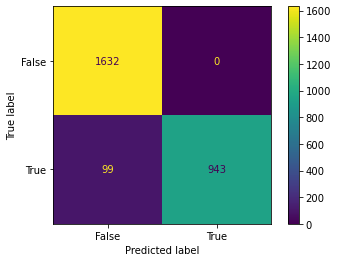

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_recent, y_pred_recent)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [15]:
accuracy_recent

0.962976813762154

In [16]:
classification_rep_recent

'              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97      1632\n         1.0       1.00      0.90      0.95      1042\n\n    accuracy                           0.96      2674\n   macro avg       0.97      0.95      0.96      2674\nweighted avg       0.97      0.96      0.96      2674\n'